In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# We want to ignore warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils.validation import check_is_fitted
# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/spain-electricity-shortfall-challenge-2023/sample_submission_load_shortfall (1).csv
/kaggle/input/spain-electricity-shortfall-challenge-2023/df_train.csv
/kaggle/input/spain-electricity-shortfall-challenge-2023/df_test.csv


## Loading the Data


In [2]:
df_sample = pd.read_csv('/kaggle/input/spain-electricity-shortfall-challenge-2023/sample_submission_load_shortfall (1).csv')
df_train = pd.read_csv('/kaggle/input/spain-electricity-shortfall-challenge-2023/df_train.csv')
df_test = pd.read_csv('/kaggle/input/spain-electricity-shortfall-challenge-2023/df_test.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df_sample.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,0
1,2018-01-01 03:00:00,1
2,2018-01-01 06:00:00,2
3,2018-01-01 09:00:00,3
4,2018-01-01 12:00:00,4


In [4]:
df_train.shape

(8763, 49)

In [5]:
df_test.shape

(2920, 48)

In [6]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


In [8]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [9]:
# Check for null values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [10]:
# evaluate correlation
correl = df_train[['Madrid_wind_speed','Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
    'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed','Seville_clouds_all', 'Bilbao_wind_deg', 
    'Barcelona_wind_speed','Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 
    'Seville_rain_1h','Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
    'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure','Seville_weather_id', 
    'Valencia_pressure', 'Seville_temp_max','Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp','Bilbao_weather_id', 
    'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 
    'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 
    'Madrid_temp_min', 'load_shortfall_3h']].corr()
correl

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


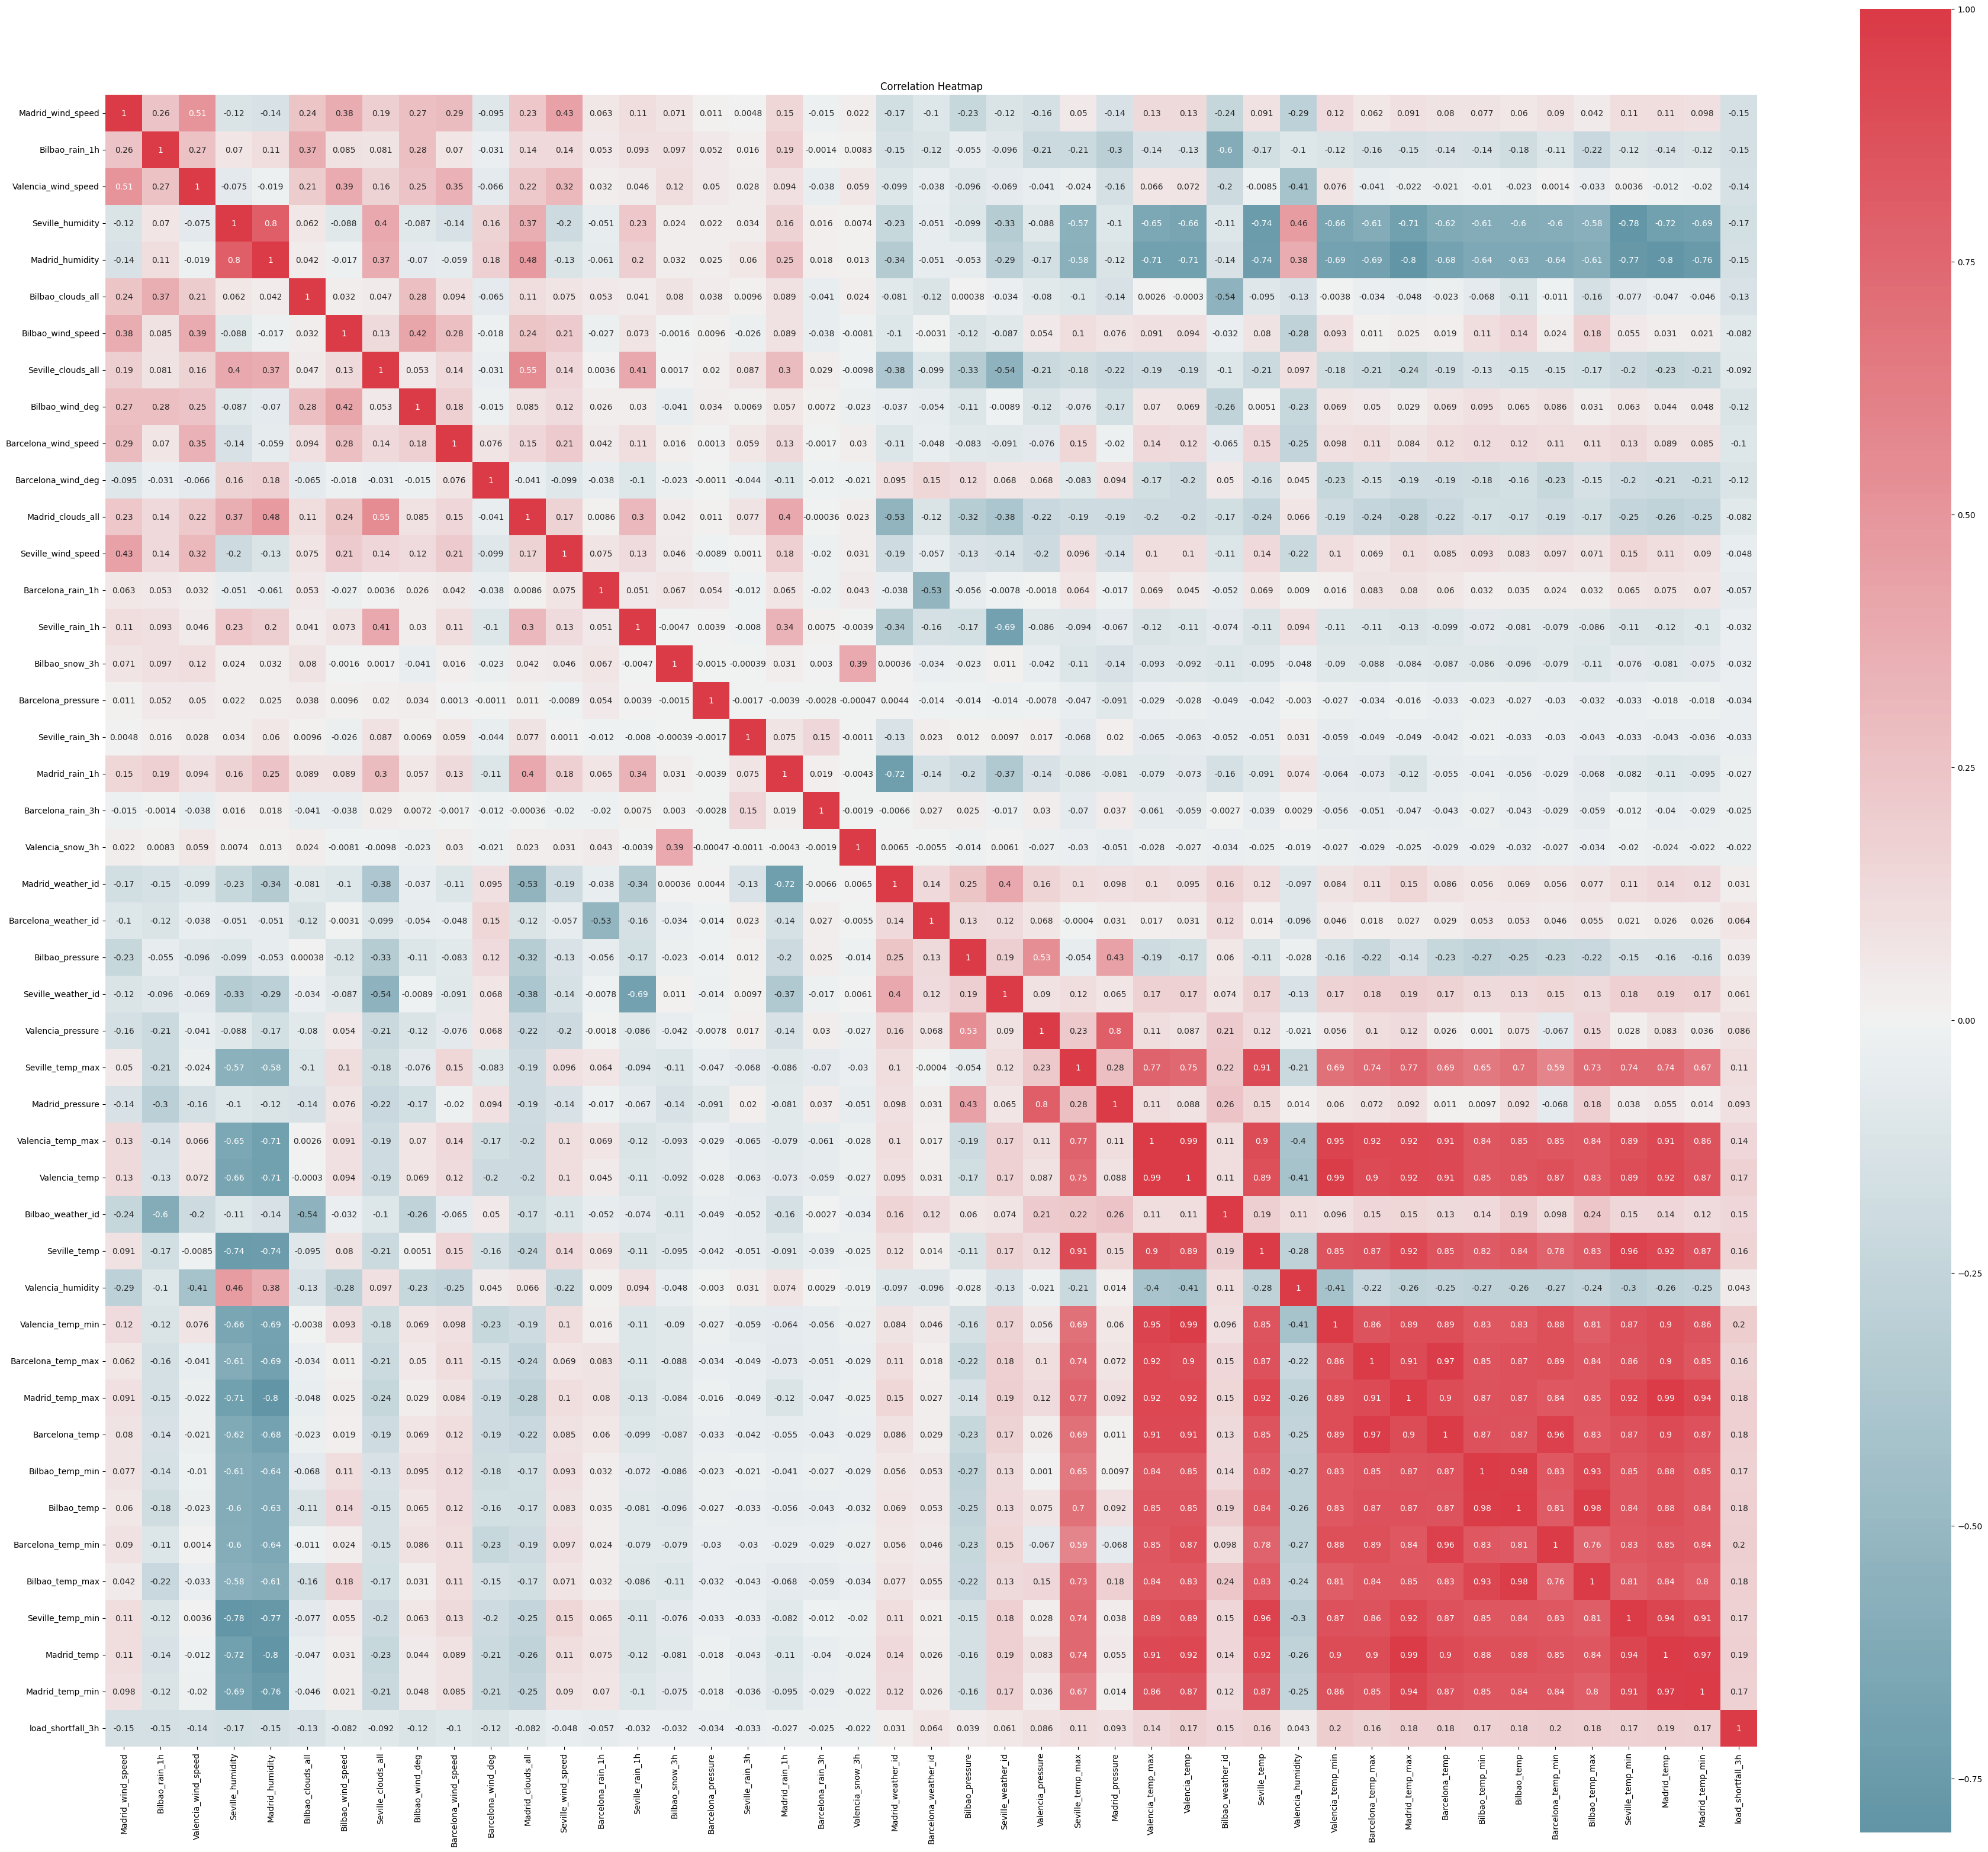

In [11]:
# plot relevant feature interactions
plt.figure(figsize=(45, 40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(correl, cmap=cmap, center=0, annot=True, square=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12})
plt.show();

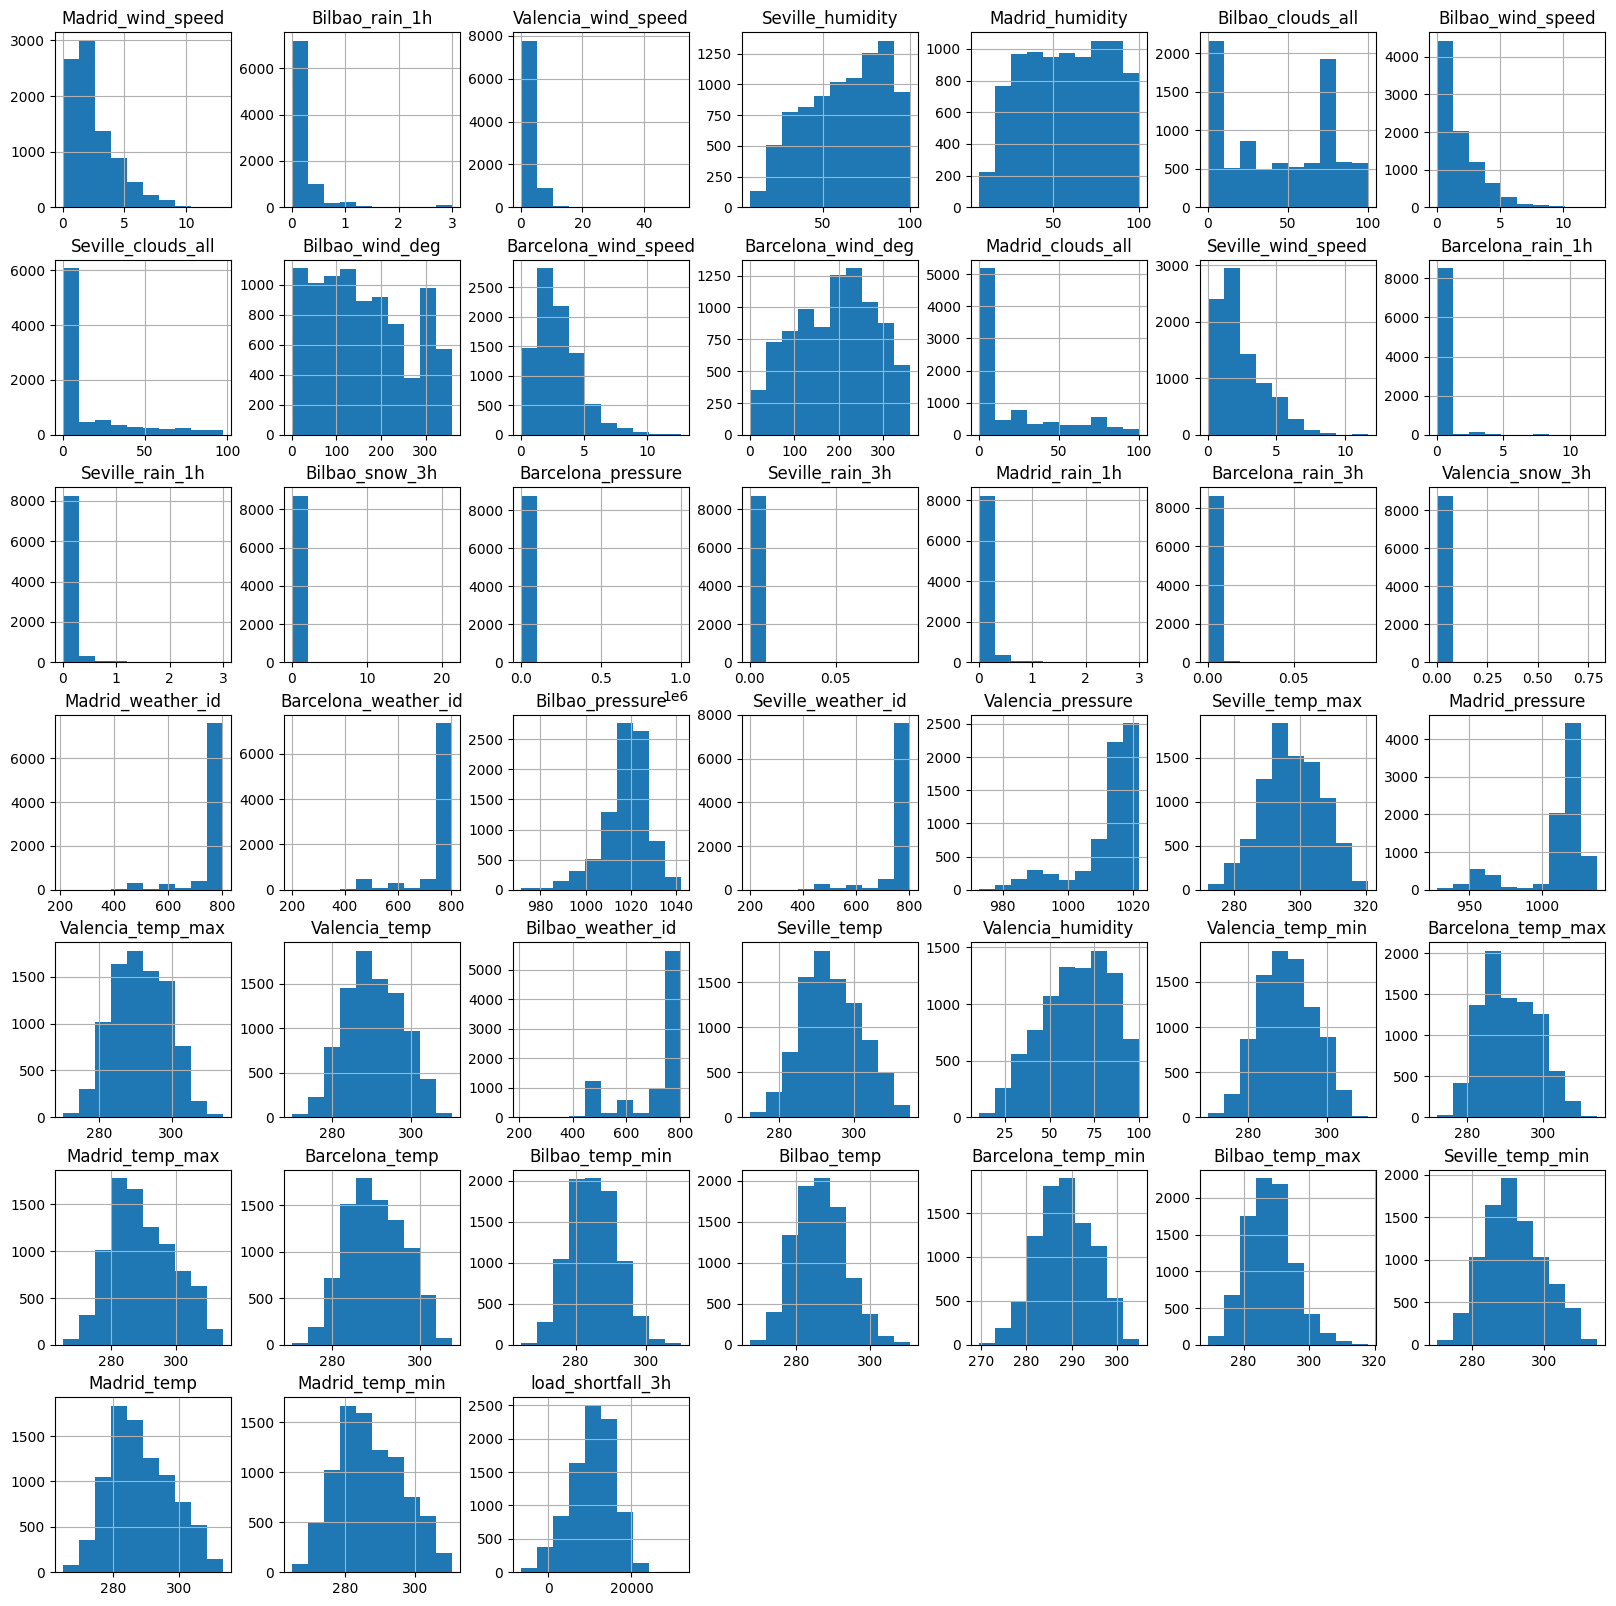

In [12]:
# have a look at feature distributions
features = ['time', 'Madrid_wind_speed','Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'] # create a list of all numerical features
df_train[features].hist(figsize=(20,20));


### Merging Dataset to simplify work

In [13]:
df = pd.concat([df_train, df_test])
df.shape

(11683, 49)

In [14]:
# Calculating the value of the `measure of central tendency` to fill the missing values
print('Mean: ', df['Valencia_pressure'].mean())
print('Median: ', df['Valencia_pressure'].median())
print('Mode: ', df['Valencia_pressure'].mode())

Mean:  1012.3466870428987
Median:  1015.0
Mode:  0    1018.0
Name: Valencia_pressure, dtype: float64


#### Now let's fix the `Valencia_pressure` column


In [15]:
# To keep the original df, assign another name
df_clean = df

In [16]:
# fill missing values/ features in `Valencia_pressure` with the modal value
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [17]:
df_clean.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [18]:
# Convert time column from object type to daytime
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['time'].head()

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
2   2015-01-01 09:00:00
3   2015-01-01 12:00:00
4   2015-01-01 15:00:00
Name: time, dtype: datetime64[ns]

#### Split the time column into different columns

In [19]:
df_clean['year'] = df_clean['time'].dt.year
df_clean['month'] = df_clean['time'].dt.month
df_clean['day'] = df_clean['time'].dt.day
df_clean['hour'] = df_clean['time'].dt.hour
df_clean['minute'] = df_clean['time'].dt.minute
df_clean['second'] = df_clean['time'].dt.second

In [20]:
df_clean.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour,minute,second
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,274.910000,271.150000,NaN,2018,12,31,9,0,0
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.150000,283.156667,280.483333,NaN,2018,12,31,12,0,0
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,290.816667,287.733333,286.483333,NaN,2018,12,31,15,0,0
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,287.483333,283.813333,282.150000,NaN,2018,12,31,18,0,0
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,283.816667,276.623333,276.483333,NaN,2018,12,31,21,0,0


In [21]:
df_clean['Valencia_wind_deg'].head()

0     level_5
1    level_10
2     level_9
3     level_8
4     level_7
Name: Valencia_wind_deg, dtype: object

In [22]:
# extract the numbers is "Valencia_wind_deg" 
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'].head()

0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: object

In [23]:
# transform the "Valencia_wind_deg" column to numeric
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
df_clean['Valencia_wind_deg'].head()

0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: int64

In [24]:
df_clean['Seville_pressure'].head()

0    sp25
1    sp25
2    sp25
3    sp25
4    sp25
Name: Seville_pressure, dtype: object

In [25]:
# extract the numbers is "Seville_pressure" 
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
df_clean['Seville_pressure'].head()

0    25
1    25
2    25
3    25
4    25
Name: Seville_pressure, dtype: object

In [26]:
# transform the "Seville_pressure" column to numeric
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])
df_clean['Seville_pressure'].head()

0    25
1    25
2    25
3    25
4    25
Name: Seville_pressure, dtype: int64

In [27]:
# Drop collumns 'Unnamed: 0' and 'time'
df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis = 1)
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour,minute,second
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,0,0
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,0,0
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,0,0
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12,0,0
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15,0,0


## Modelling

#### Split data

In [28]:
y = df_clean[:len(df_train)][['load_shortfall_3h']]
print(y.shape)
y.head()

(8763, 1)


,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [29]:
x = df_clean[:len(df_train)].drop('load_shortfall_3h', axis=1)
print(x.shape)
x.head()

(8763, 52)


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour,minute,second
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,274.254667,265.938000,265.938000,2015,1,1,3,0,0
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,274.945000,266.386667,266.386667,2015,1,1,6,0,0
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,278.792000,272.708667,272.708667,2015,1,1,9,0,0
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,285.394000,281.895219,281.895219,2015,1,1,12,0,0
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,285.513719,280.678437,280.678437,2015,1,1,15,0,0


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
# create model object
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=8,
    min_samples_split=3,
    min_samples_leaf=2,
    subsample=0.8,
    max_features=None
)

In [32]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [33]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)
x_train.shape

(7010, 52)

In [34]:
x_test.shape

(1753, 52)

In [35]:
# train model
model.fit(x_train, y_train.values.ravel())
pred_y = model.predict(x_test)

In [36]:
# Evaluating the model
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [37]:
rmse(y_test, pred_y)

2876.9367518143004

In [38]:
r2_score(y_test, pred_y)

0.6902564682453295

#### Now, using the whole x_train

In [39]:
# create targets and features dataset
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h', axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h', axis=1)
print(x_train.shape)
print(x_test.shape)

(8763, 52)
(2920, 52)


In [40]:
model.fit(x_train, y.values.ravel())
pred_y = model.predict(x_test)

In [41]:
daf = pd.DataFrame(pred_y, columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,13584.475246
1,9677.807378
2,6547.282149
3,10936.624147
4,15496.087741


#### My Submission

In [42]:
output = pd.DataFrame({'time': df_test['time']})
submission = output.join(daf)
submission.to_csv("submission.csv", index = False)

In [43]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13584.475246
1,2018-01-01 03:00:00,9677.807378
2,2018-01-01 06:00:00,6547.282149
3,2018-01-01 09:00:00,10936.624147
4,2018-01-01 12:00:00,15496.087741
...,...,...
2915,2018-12-31 09:00:00,11673.997055
2916,2018-12-31 12:00:00,12248.583595
2917,2018-12-31 15:00:00,9669.664825
2918,2018-12-31 18:00:00,10257.103688
